<a href="https://colab.research.google.com/github/operantes/Omdena-NeedEnergy/blob/gcolab/Omdena_NE_AML_Task2_Data_Wrangling_Lib_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Omdena-NeedEnergy "Increasing Clean Energy Access in Africa" project](https://omdena.com/projects/clean-energy-ai/)
#### A.Montesino (Feb 10th, 2021)
### Task 2 - Data Wrangling - Library-based EDA (Pandas Profiling, Sweetviz, Autoviz, and D-Tale)

References:
* [4 Libraries that can perform EDA in one line of python code](#https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae?gi=251de7bdb148)  
(Click on section heading for URL back to the library-specific details of such a section)


In [ ]:
# Install common libraries

# NumPy
try:
    import numpy as np
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install numpy
# Required by pandas' read_excel()
try:
    import xlrd
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install xlrd
# pandas
try:
    import pandas as pd
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install pandas

For details on accesing data from Google.Colab, through Google Drive, please go to: 
* [Google Colab - Local File System - API REST](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=jRQ5_yMcqJiV)  
* [Importing files from Google Drive in Colab - Mounting Google Drive](https://buomsoo-kim.github.io/colab/2020/05/09/Colab-mounting-google-drive.md)  

In [ ]:
# First step is getting the authorization code by loggin into your Google account. Then, paste the authorization code and press Enter.

from google.colab import drive
drive.mount('/content/drive')
# !ls -lRa

Mounted at /content/drive
.:
total 20
drwxr-xr-x 1 root root 4096 Feb 16 14:00 .
drwxr-xr-x 1 root root 4096 Feb 16 13:58 ..
drwxr-xr-x 1 root root 4096 Feb 10 14:40 .config
drwx------ 5 root root 4096 Feb 16 14:00 drive
drwxr-xr-x 1 root root 4096 Feb 10 14:40 sample_data

./.config:
total 40
drwxr-xr-x 1 root root 4096 Feb 10 14:40 .
drwxr-xr-x 1 root root 4096 Feb 16 14:00 ..
-rw-r--r-- 1 root root    7 Feb 10 14:39 active_config
-rw-r--r-- 1 root root    0 Feb 10 14:39 config_sentinel
drwxr-xr-x 2 root root 4096 Feb 10 14:39 configurations
-rw------- 1 root root    5 Jan  1  2040 gce
-rw-r--r-- 1 root root    3 Feb 10 14:39 .last_opt_in_prompt.yaml
-rw-r--r-- 1 root root   37 Feb 10 14:39 .last_survey_prompt.yaml
-rw-r--r-- 1 root root  135 Feb 10 14:39 .last_update_check.json
drwxr-xr-x 3 root root 4096 Feb 10 14:39 logs
-rw-r--r-- 1 root root   32 Feb 10 14:40 .metricsUUID

./.config/configurations:
total 12
drwxr-xr-x 2 root root 4096 Feb 10 14:39 .
drwxr-xr-x 1 root root 4096 F

In [ ]:
DATA_ROOT_DIR ="C:/Users/alvar/OneDrive/Personal/Repositorio/Data Analytics/Omdena/NeedEnergy/Data"
DATA_DIR =DATA_ROOT_DIR+"/"+"NeedEnergy Meter Data/data for Mini Substation"
INPUT_FILE =DATA_DIR+"/"+"Electricity usage - 2020-01-01 - 2021-02-09 - daily.xlsx"

DATA_ROOT_DIR ="/content/drive/.shortcut-targets-by-id/1-932atNbEPl9G5ZUOl6fmAvnpYEF4TSE/Data/NeedEnergy Meter Data"
DATA_DIR =DATA_ROOT_DIR+"/"+"NeedEnergy API Data "
INPUT_FILE =DATA_DIR+"/"+"data_daily_id_47740.csv"

!ls -lR "$INPUT_FILE"
!head -5 "$INPUT_FILE"

-rw------- 1 root root 199618 Feb 12 21:07 '/content/drive/.shortcut-targets-by-id/1-932atNbEPl9G5ZUOl6fmAvnpYEF4TSE/Data/NeedEnergy Meter Data/NeedEnergy API Data /data_daily_id_47740.csv'
date,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,phaseVoltages,currentHarmonics,voltageHarmonics
2020-03-12,1583964000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[569.9, 3.3, 1521.0, 415.9, 0.0, 0.0, 0.0, 0.0, 64.2, 57.0, 19.6, 1684.5, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]","[85.6, 4.5, 1055.6, 83.6, 0.0, 0.0, 0.1, 0.0, 9.5, 8.5, 23.4, 1001.6, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]","[208.4, None, None]","[208.4, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]","[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

## [Pandas Profiling](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/introduction.html)

EDA using the pandas-profiling package

In [ ]:
# First install and import required packages
try:
    import pandas as pd
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install pandas

try:
    from pandas_profiling import ProfileReport
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install pandas-profiling

In [ ]:
p = pd.read_csv( INPUT_FILE )
p.head()

,date,timestamp,consumption,solar,alwaysOn,gridImport,gridExport,selfConsumption,selfSufficiency,active,reactive,voltages,phaseVoltages,currentHarmonics,voltageHarmonics
0,2020-03-12,1583964000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[569.9, 3.3, 1521.0, 415.9, 0.0, 0.0, 0.0, 0.0...","[85.6, 4.5, 1055.6, 83.6, 0.0, 0.0, 0.1, 0.0, ...","[208.4, None, None]","[208.4, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
1,2020-03-13,1584050400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[None, None, 2511.8, 503.7, 0.0, 0.0, 0.0, 0.0...","[None, None, 1725.8, 97.5, 0.0, 0.0, 0.0, 0.0,...","[217.8, None, None]","[217.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
2,2020-03-14,1584136800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[None, None, 16232.9, 3384.0, -1.3, 0.0, 4582....","[None, None, 11256.7, 667.7, 0.0, 0.0, 3225.7,...","[220.0, None, None]","[220.0, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
3,2020-03-15,1584223200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[None, None, 9933.3, 3241.0, -0.7, 3837.5, 248...","[None, None, 8569.6, 659.4, 0.0, 2536.9, 2920....","[224.8, None, None]","[224.8, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."
4,2020-03-16,1584309600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[None, None, 10946.7, 2811.5, -0.6, 14695.0, -...","[None, None, 8586.6, 563.0, 0.0, 6603.2, 7451....","[221.7, None, None]","[221.7, None, None]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [..."


### Issue

Invocation of the following pandas-profiling methods, where at least the first two happen to run OK in a Jupyter environment...

<code>  
1) ProfileReport( pd.read_csv( INPUT_FILE ) )   
2) ProfileReport( pd.read_csv( INPUT_FILE ), explorative=True )   
3) ProfileReport( p, title='Pandas Profiling Report', html={'style':{'full_width':True}})
</code>

... now, under a Google Colab environment, results in the following respective errors:

**<CODE>      
1) TypeError: describe_unique_1d() got an unexpected keyword argument 'explorative'  
2) concat() got an unexpected keyword argument 'join_axes'
3) TypeError: describe_unique_1d() got an unexpected keyword argument 'title'
</CODE>**  
       
Based on the following debugging instructions  

1) "[Error while running profiling report using pandas, giving me an error “TypeError: describe_boolean_1d() got an unexpected keyword argument 'title'”](https://stackoverflow.com/questions/60650617/error-while-running-profiling-report-using-pandas-giving-me-an-error-typeerror)

2) "[concat() got an unexpected keyword argument 'join_axes'](https://stackoverflow.com/questions/61362942/concat-got-an-unexpected-keyword-argument-join-axes)
3) 

...the following steps might (?) make sense.

**texto en negrita**

In [ ]:
pip install pandas-profiling[notebook,html]

In [ ]:
pip install pymc3

### Issue
Invokation of the following pandas-profiling method, which happens to runs OK in Jupyter environment,  

 **<CODE> ProfileReport( p, title='Pandas Profiling Report', html={'style':{'full_width':True}})**</CODE>  

...now breaks when run under Google Colab, as it results in the following interpreter error:   

**<CODE>      TypeError: describe_unique_1d() got an unexpected keyword argument 'title' </CODE>**  

Based on the Stackoverflow piece called "[concat() got an unexpected keyword argument 'join_axes'](https://stackoverflow.com/questions/61362942/concat-got-an-unexpected-keyword-argument-join-axes), the following steps might (?) make sense.



In [ ]:
profile = ProfileReport( p, title='Pandas Profiling Report', html={'style':{'full_width':True}})

TypeError: ignored

In [ ]:

# Saving results to a HTML file
# OUTPUT_FILE =OUTPUT_FILE+"-"+"pandas_profiling.html"
# profile.to_file( OUTPUT_FILE )

# Outputting results inline, as part of the current notebook
profile.to_notebook_iframe()


## [Sweetviz](https://github.com/fbdesignpro/sweetviz)

In [ ]:
# First install and import required packages
try:
    import pandas as pd
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install pandas

try:
    import sweetviz as sv
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install sweetviz


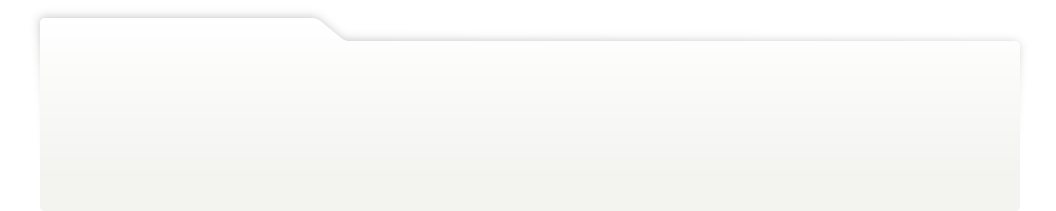
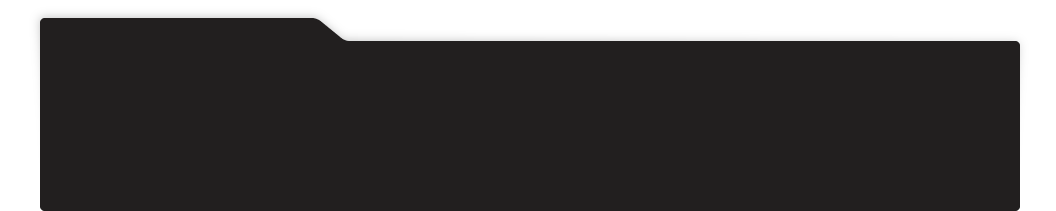
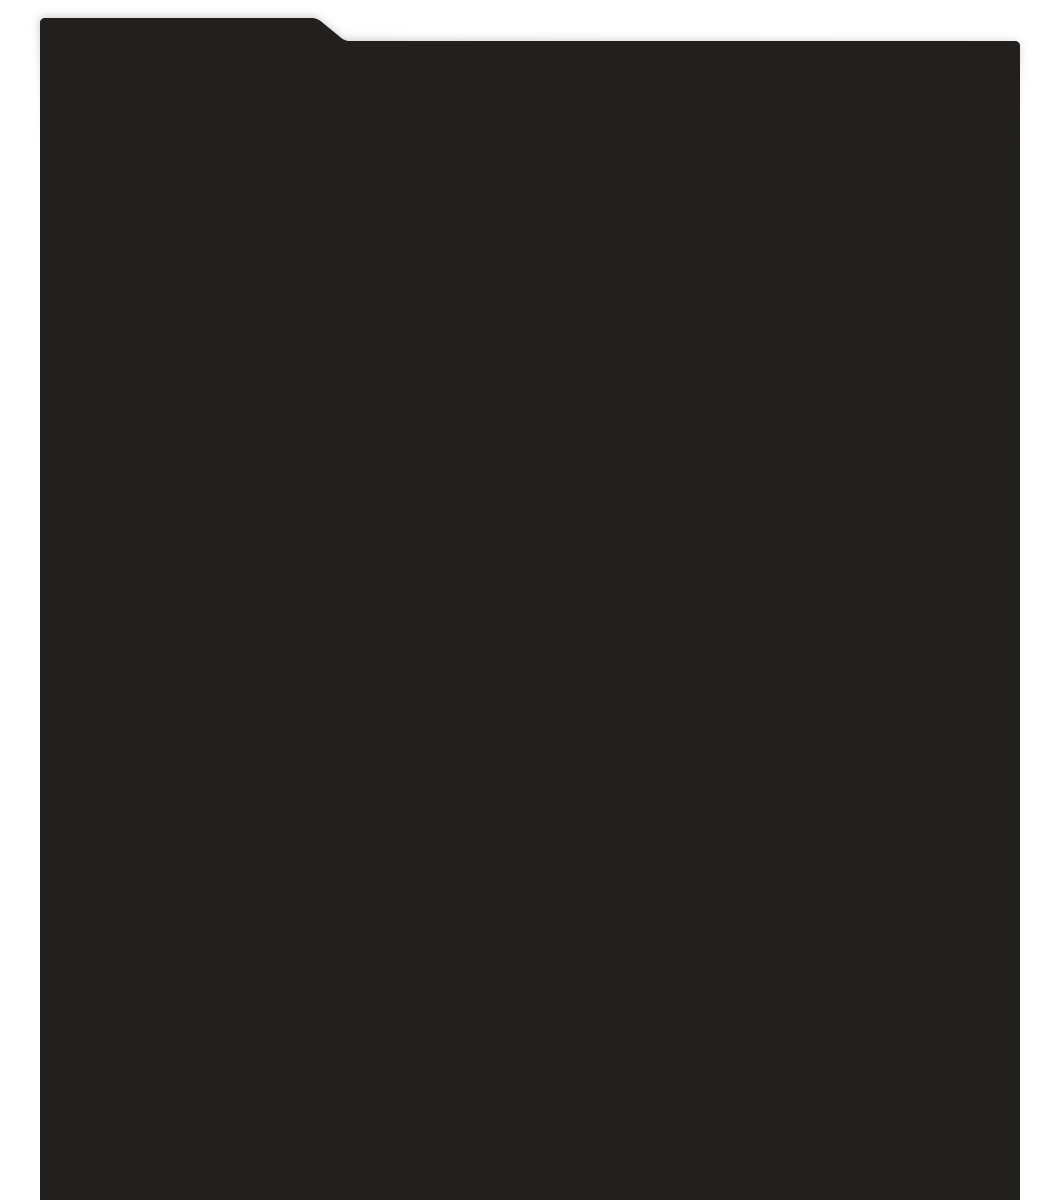
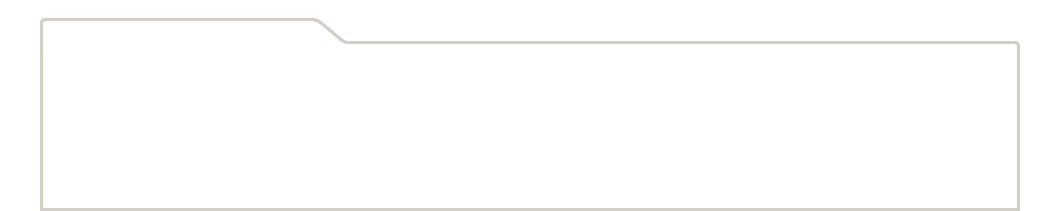
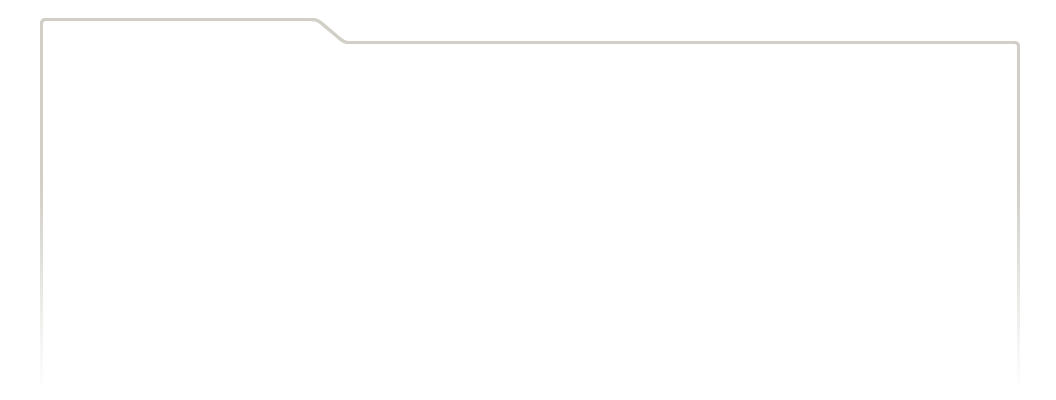
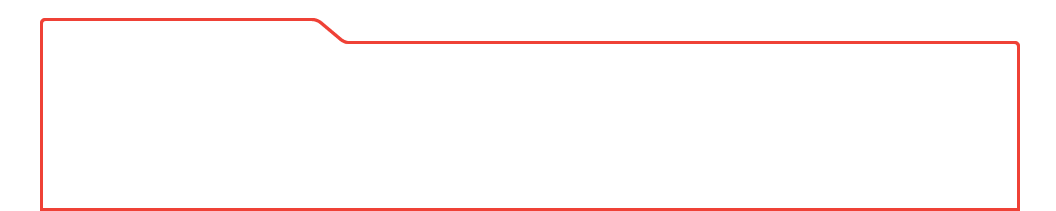
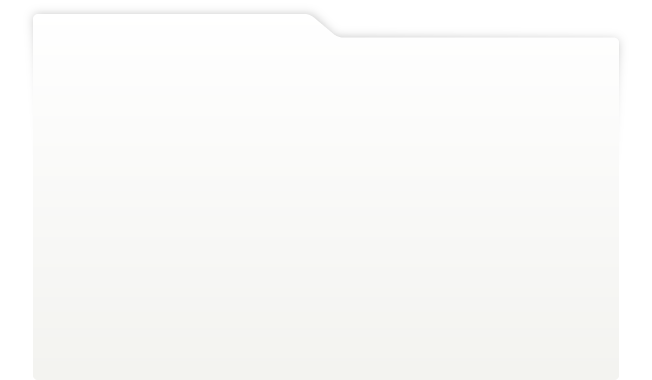
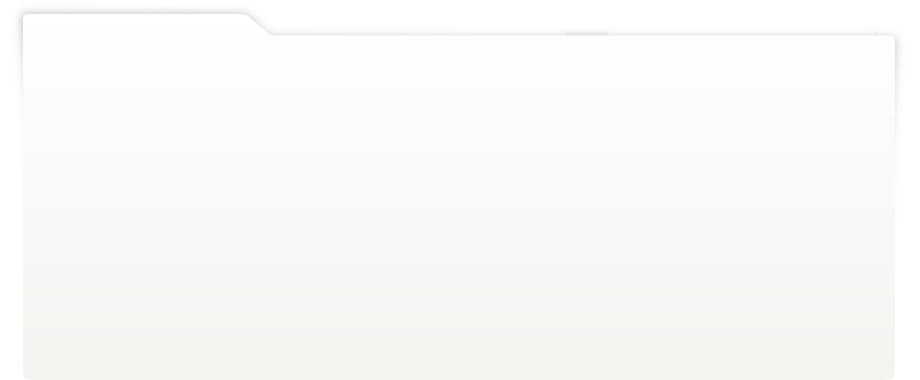
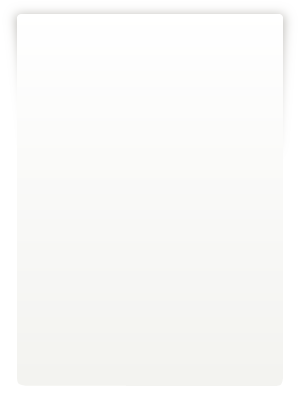
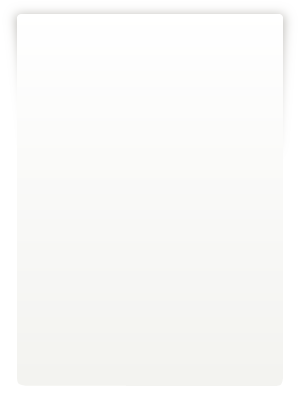
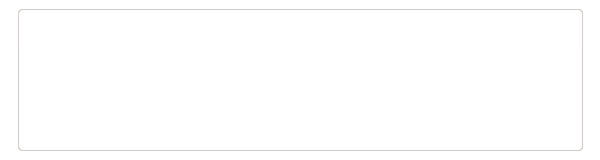
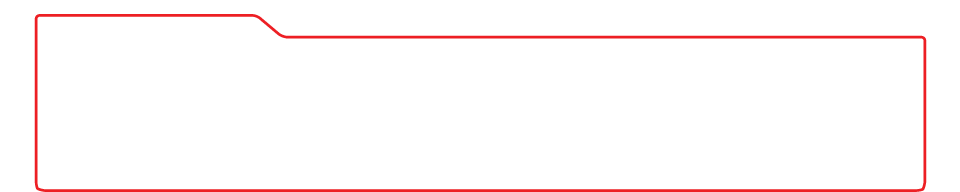
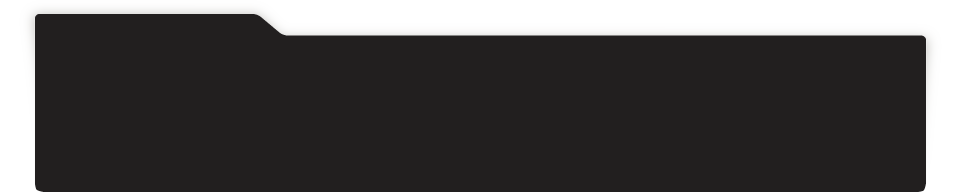
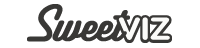
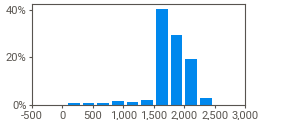
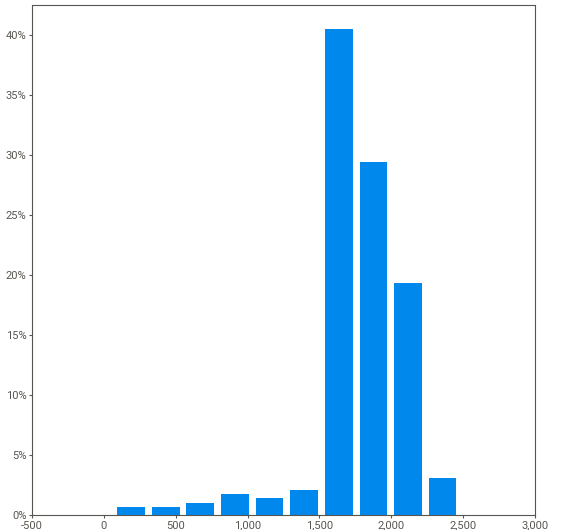
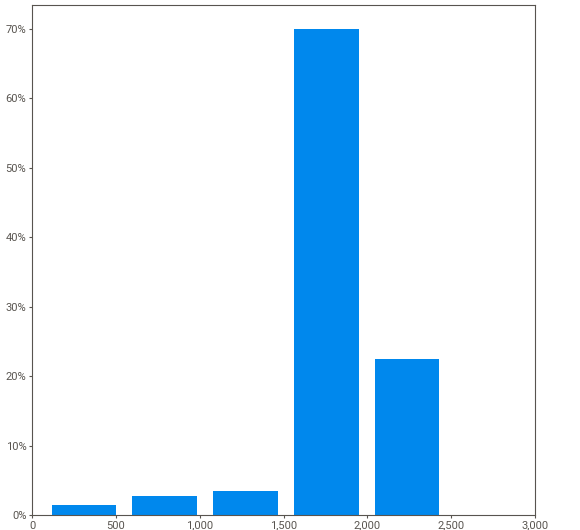
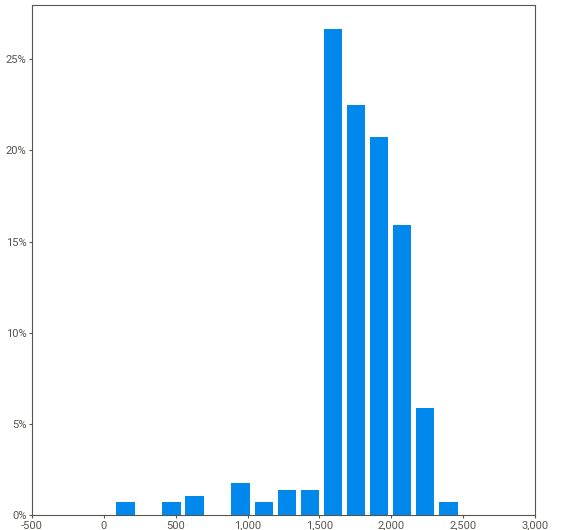
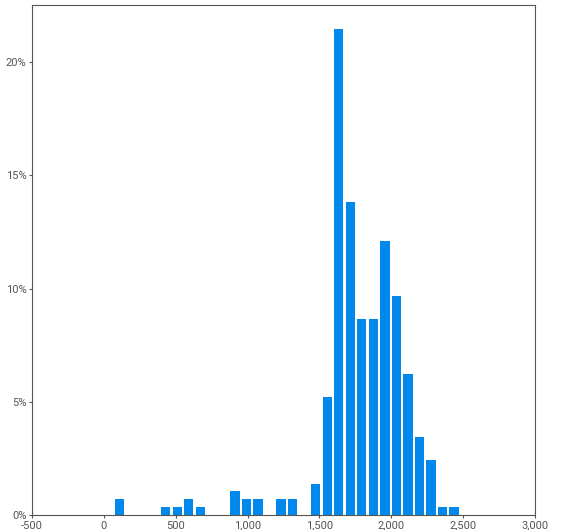
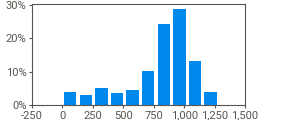
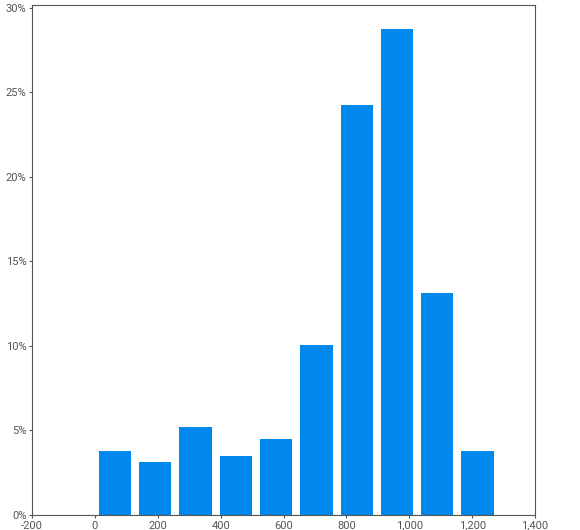
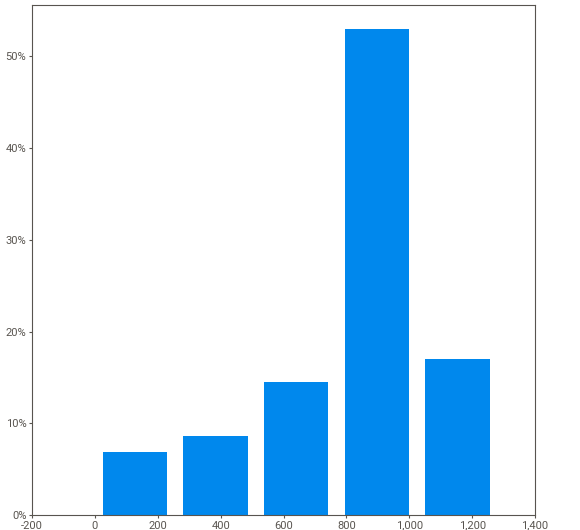
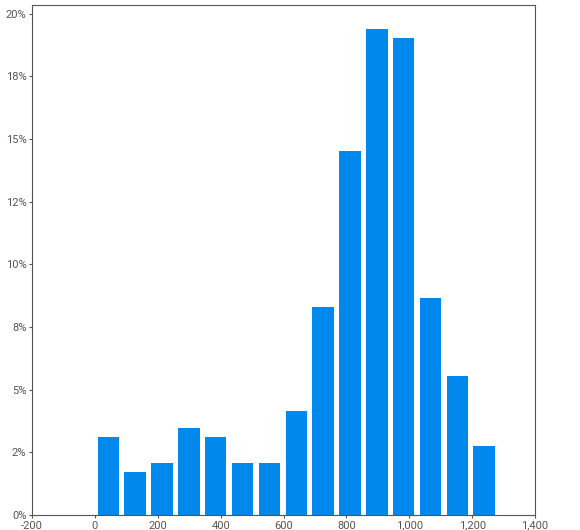
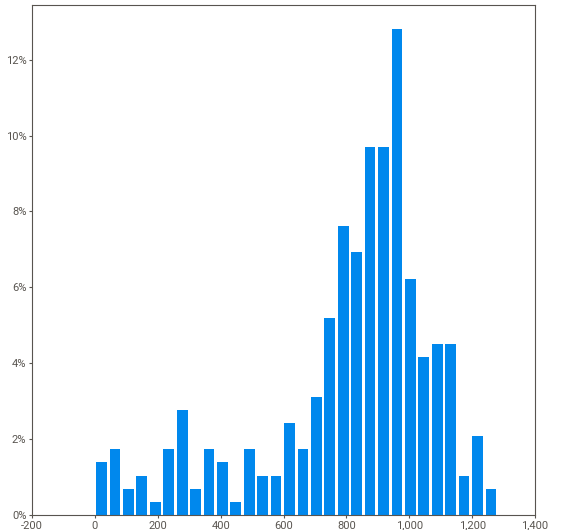
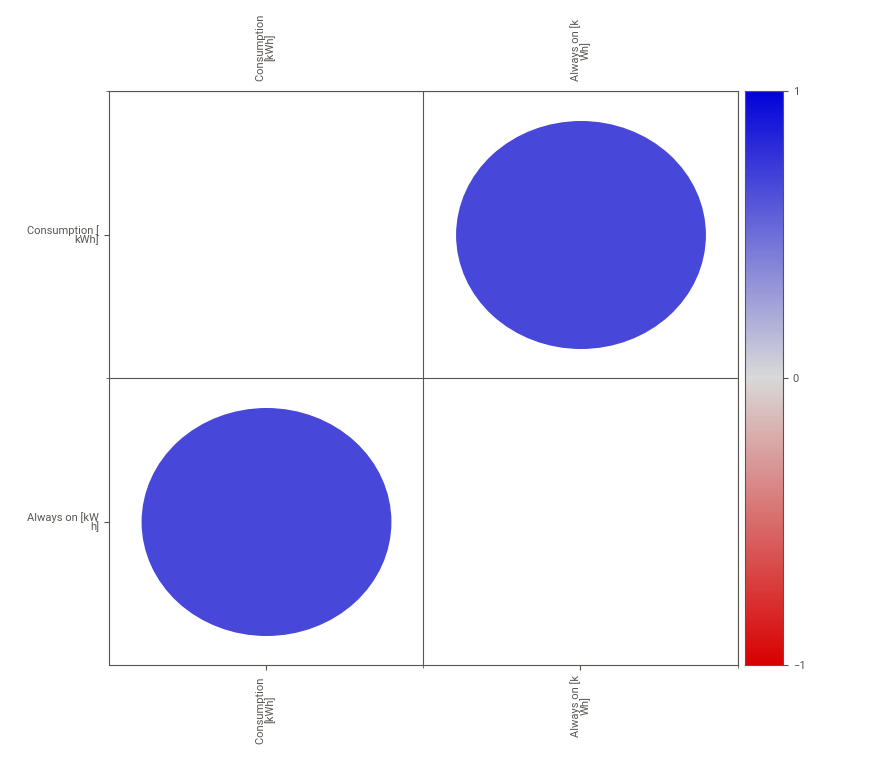
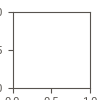

In [ ]:
#EDA using Sweetviz
sweet_report = sv.analyze( pd.read_csv( INPUT_FILE ) )

# Saving results to HTML file
# Default arguments will generate to "SWEETVIZ_REPORT.html"
# sweet_report.show_html( )
# Sending output to a specific destination directory other than working directory, requires invokation with explicit parameters 
# OUTPUT_FILE =INPUT_FILE+"-"+"SWEETVIZ_REPORT.html"
# sweet_report.show_html( filepath=OUTPUT_FILE, open_browser=True, layout='widescreen', scale=None )

# Outputting results inline, as part of the current notebook
sweet_report.show_notebook( )

## [Autoviz](https://github.com/AutoViML/AutoViz/blob/master/README.md)

In [ ]:
# First install and import required packages
try:
    import pandas as pd
except ImportError as e:
    # module doesn't exist, deal with it.
    import pandas as pd

try:
    from autoviz.AutoViz_Class import AutoViz_Class
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install autoviz

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


[4.1.4.4. LOESS (aka LOWESS)](https://www.itl.nist.gov/div898/handbook/pmd/section1/pmd144.htm)

Shape of your Data Set: (289, 3)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    3 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3


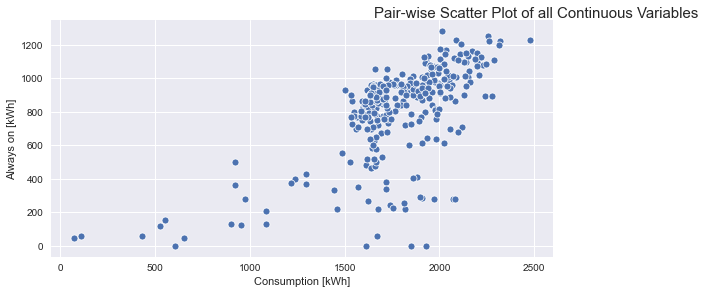

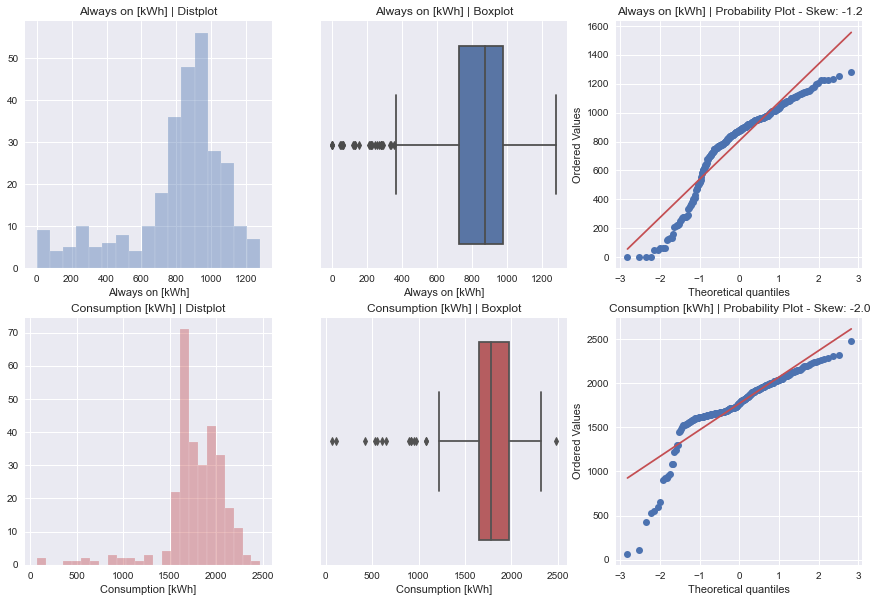

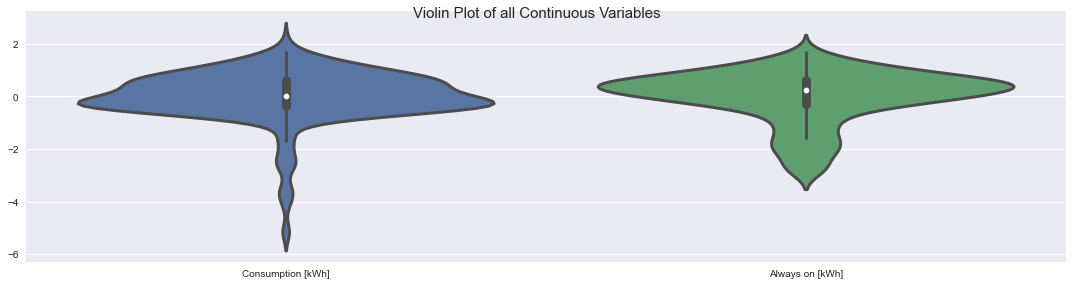

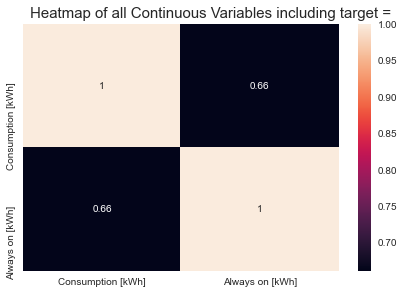

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 1.853

 ###################### VISUALIZATION Completed ########################


In [ ]:
# EDA using AutoViz

# verbose option
#     if 0, display minimal information but displays charts on your notebook
#     if 1, print extra information on the notebook and also display charts
#     if 2, will not display any charts, it will simply save them in your local machine under AutoViz_Plots directory
# OUTPUT_FILE =INPUT_FILE+"/"+"AutoViz_Plots"
autoviz = AutoViz_Class().AutoViz( INPUT_FILE, verbose=0 )


## [D-Tale](#https://github.com/man-group/dtale/blob/master/README.md)

In [ ]:
# First install and import required packages
try:
    import pandas as pd
except ImportError as e:
    # module doesn't exist, deal with it.
    import pandas as pd

try:
    import dtale
except ImportError as e:
    # module doesn't exist, deal with it.
    ! pip install dtale

The D-Tale package requires interactive human input with the menu that pops-up [from the upper left corner of the dataframe](https://github.com/man-group/dtale/blob/master/README.md#ui).
To an certain extent, it is so versatile that in order to benefit from it, the user requires some prior training. 
Haven't found out how to generate an inline report with a default choice of EDA topics covered.


In [ ]:

dtale.show( pd.read_excel( INPUT_FILE ) )
